## Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


X denotes the independent variable

In [3]:
X = df.iloc[:,0:2]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


y denotes dependent or target variable

In [4]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [7]:
X_train

,Age,EstimatedSalary
94,29,83000
91,30,116000
89,35,50000
329,47,107000
129,26,84000
...,...,...
393,60,42000
218,46,96000
223,60,102000
271,59,76000


In [8]:
y_train

94     0
91     0
89     0
329    1
129    0
      ..
393    1
218    0
223    1
271    1
355    1
Name: Purchased, Length: 320, dtype: int64

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
model = lr.fit(X_train,y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_test

10     0
382    1
374    0
196    0
47     0
      ..
336    1
398    0
45     0
373    1
28     0
Name: Purchased, Length: 80, dtype: int64

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.4375

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5625

### To Improve accuracy of model we will perform scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
X_test

array([[-1.22707264,  0.12131952],
       [ 0.55595925,  1.72982545],
       [-0.13744204,  0.12131952],
       [-0.83084333,  0.0940567 ],
       [-1.12801531, -0.58751361],
       [-0.13744204,  0.12131952],
       [-1.52424462, -1.29634673],
       [ 1.54653252,  0.88467827],
       [ 0.15972994, -0.50572517],
       [-0.23649937,  1.34814608],
       [ 0.7540739 ,  0.0940567 ],
       [-0.63272868, -1.56897486],
       [ 1.34841787,  2.02971639],
       [ 0.85313123, -0.7783533 ],
       [-0.63272868,  0.28489639],
       [-0.92990066, -0.88740455],
       [-1.12801531,  0.39394764],
       [ 0.65501658, -1.35087236],
       [-1.52424462, -0.75109048],
       [ 1.8437045 ,  1.26635764],
       [-0.3355567 , -0.28762267],
       [ 0.06067261, -0.91466736],
       [-1.62330195, -0.5602508 ],
       [-1.22707264, -1.6507633 ],
       [ 0.35784459, -0.58751361],
       [-0.63272868,  2.02971639],
       [-0.03838471, -0.5602508 ],
       [-0.3355567 , -0.06952017],
       [ 1.05124588,

In [19]:
model = lr.fit(X_train,y_train)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

0.2

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8

In [23]:
from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
precision

0.9523809523809523

In [27]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
recall

0.5714285714285714

### Creating a Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[44,  1],
       [15, 20]], dtype=int64)

<Axes: >

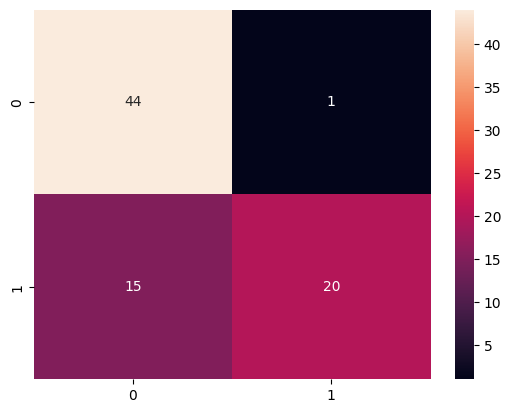

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True)